# TEXT CLUSTERING

## ASSIGNMENT I

### Bag of Words and TF-IDF

#### BOW

##### Step 1 : Mentokenisasi data, menghilangkan stop words dan melakukan stemming atau lemitasi.

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import re

paragraph = """The news mentioned here is fake. Audience do not encourage fake news. Fake news is false or misleading"""
	

sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()
	
corpus = []
	
for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
    sent = sent.lower()
    sent= sent.split()
    sent = [lemmatizer.lemmatize(word) for word in sent if not word in set(stopwords.words('english'))]
    sent = ' '.join(sent)   
    corpus.append(sent)
print(corpus)

['news mentioned fake', 'audience encourage fake news', 'fake news false misleading']


##### Step 2: List semua kata unik
##### ['false', 'misleading', 'audience', 'encourage', 'mentioned', 'news', 'fake']

##### Step 3: Membuat sebuah dictionary dengan memetakan huruf menjadi angka. Kemudian urutkan kata dari tertinggi ke terendah.
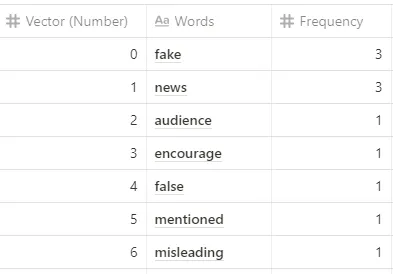

##### Step 4: Sekarang, membuat sebuah tabel untuk setiap kalimat, untuk setiap kata yang ada pada dictionary, isi dengan angka '1' jika tidak isi dengan '0'.
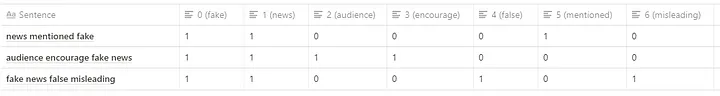

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
independentFeatures = cv.fit_transform(corpus).toarray()
print(independentFeatures)

[[0 0 1 0 1 0 1]
 [1 1 1 0 0 0 1]
 [0 0 1 1 0 1 1]]


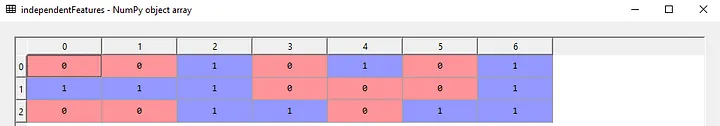

#### TF-IDF

##### Step 1 : Melalui stemming atau lemmatization, kita akan mengubah data dengan menghilangkan imbuhan kata atau mengembalikan kata-kata ke bentuk dasarnya. Setelah itu, kita akan mengambil semua kata unik dari data tersebut dan mengurutkannya berdasarkan seberapa sering kata-kata tersebut muncul. Tiga langkah ini mirip dengan apa yang kita lakukan dalam konsep BOW.
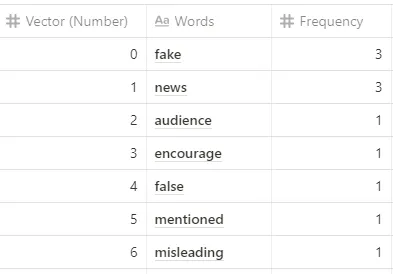

##### Step 2: Menghitung nilai frequency
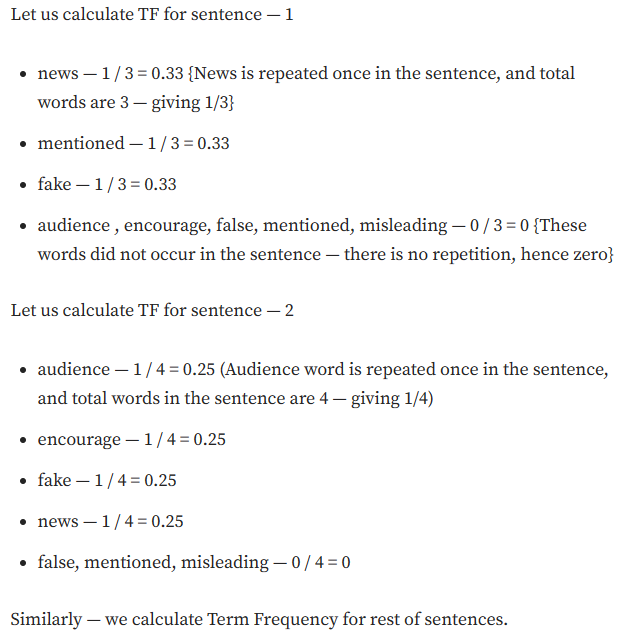
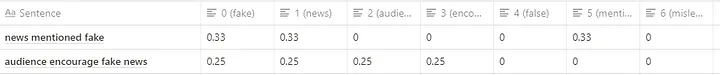

##### Step 3 : Menghitung IDF
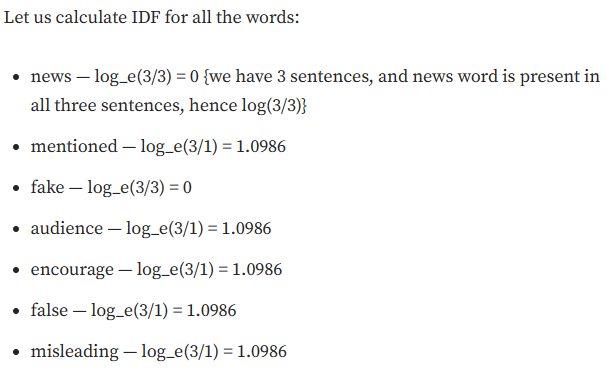

##### Step 5 : Menghitung vektor dokumen dengan mengalikan nilai TF (Term Frequency) dan IDF (Inverse Document Frequency), menggunakan modul TfidfVectorizer dari scikit-learn.

In [5]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
independentFeatures_tfIDF = tfidf.fit_transform(corpus).toarray()
print(independentFeatures_tfIDF)

[[0.         0.         0.45329466 0.         0.76749457 0.
  0.45329466]
 [0.6088451  0.6088451  0.35959372 0.         0.         0.
  0.35959372]
 [0.         0.         0.35959372 0.6088451  0.         0.6088451
  0.35959372]]


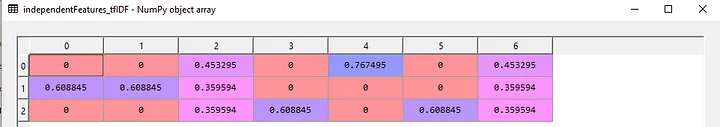

### Text Clustering with TF-IDF in Python

#### Dataset

In [7]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
newsgroups_train = fetch_20newsgroups(subset='train')
for i in newsgroups_train.target_names:
    print(i)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [9]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
 'talk.politics.mideast',
 'talk.politics.misc',
 'sci.crypt',
 'sci.space'
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,\nAnd how come we don't pass out bullet-proof ...
1,\n\n\n Lets carry this one step further. Su...
2,"# #From the Santa Rosa (Cal.) Press-Democrat, ..."
3,Hello...\n\n Does anyone know of any C or C...
4,\n\n\tI disagree: every proposition needs a ce...
...,...
5663,"\n[KK] Bugunlerde ""jewish jokes"" muhabbetlerin..."
5664,"I've been using version 2.5.2 of ghostscript, ..."
5665,I apologize if this article is slightly confus...
5666,A brief political/cultural item.\n\nRadio stat...


#### Preprocessing

In [10]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [12]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

,corpus,cleaned
0,\nAnd how come we don't pass out bullet-proof ...,come pass bullet proof vests school promote sa...
1,\n\n\n Lets carry this one step further. Su...,lets carry one step suppose text key conclusiv...
2,"# #From the Santa Rosa (Cal.) Press-Democrat, ...",santa rosa cal press democrat april p b male s...
3,Hello...\n\n Does anyone know of any C or C...,hello anyone know c c function libraries publi...
4,\n\n\tI disagree: every proposition needs a ce...,disagree every proposition needs certain amoun...
...,...,...
5663,"\n[KK] Bugunlerde ""jewish jokes"" muhabbetlerin...",kk bugunlerde jewish jokes muhabbetlerinden es...
5664,"I've been using version 2.5.2 of ghostscript, ...",using version ghostscript quite satisfied actu...
5665,I apologize if this article is slightly confus...,apologize article slightly confusing late orig...
5666,A brief political/cultural item.\n\nRadio stat...,brief political cultural item radio station wg...


#### TF-IDF Vectorization

In [13]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [14]:
X.toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Implementation of KMeans

In [15]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(clusters)

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[4 0 4 ... 1 4 1]


#### Dimensional Reduction and Visualization

In [16]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [17]:
print(x0,"\n")
print(x1)

[-0.03241433  0.01580584  0.04273869 ...  0.19583305 -0.04407732
  0.07360843] 

[-0.0419419   0.07820985 -0.02011621 ...  0.0518362  -0.02472511
 -0.00344053]


In [18]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
print(df)

                                                 corpus  \
0     \nAnd how come we don't pass out bullet-proof ...   
1     \n\n\n    Lets carry this one step further. Su...   
2     # #From the Santa Rosa (Cal.) Press-Democrat, ...   
3     Hello...\n\n    Does anyone know of any C or C...   
4     \n\n\tI disagree: every proposition needs a ce...   
...                                                 ...   
5663  \n[KK] Bugunlerde "jewish jokes" muhabbetlerin...   
5664  I've been using version 2.5.2 of ghostscript, ...   
5665  I apologize if this article is slightly confus...   
5666  A brief political/cultural item.\n\nRadio stat...   
5667  \n\n\nI would hope that if you intend to have ...   

                                                cleaned  cluster        x0  \
0     come pass bullet proof vests school promote sa...        4 -0.032414   
1     lets carry one step suppose text key conclusiv...        0  0.015806   
2     santa rosa cal press democrat april p b male s...  

In [19]:

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
use,would,system,escrow,government,keys,chip,clipper,encryption,key

Cluster 1
us,jesus,say,believe,like,think,would,one,people,god

Cluster 2
league,play,last,hockey,players,season,games,year,team,game

Cluster 3
use,card,know,program,anyone,dos,files,file,thanks,windows

Cluster 4
edu,anyone,could,get,space,know,think,like,one,would


In [20]:
# map clusters to appropriate labels 
cluster_map = {0: "Politics", 1: "Religion", 2: "Sports", 3:"Technology", 4:"Science"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

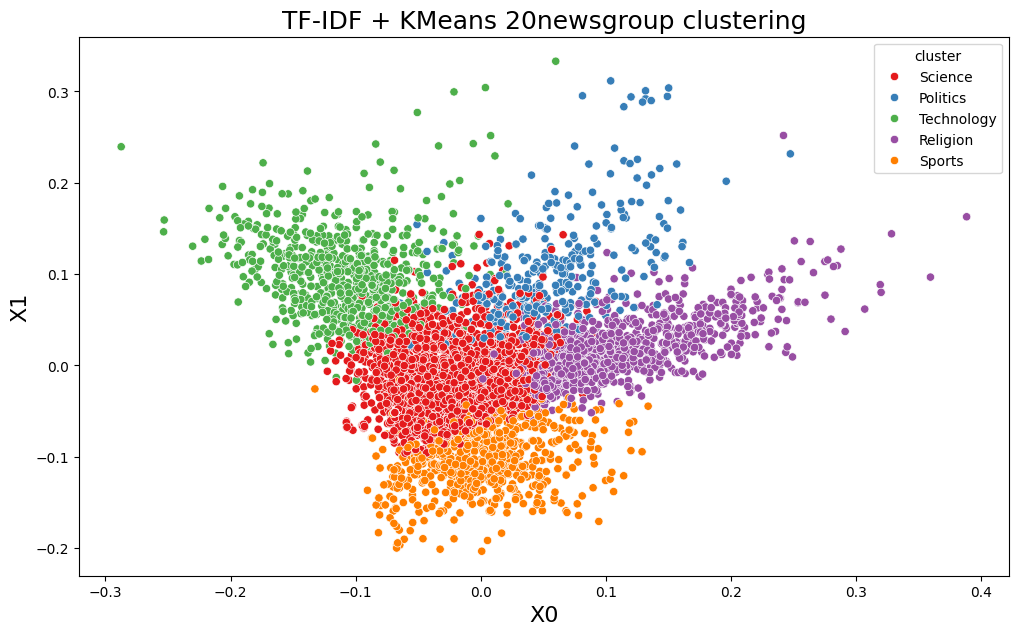

In [21]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="Set1")
plt.show()

## ASSIGNMENT II

### Perform clustering on the News dataset

In [22]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian',
              'comp.graphics']
# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Check number of records in training and testing data
len(twenty_train.data),len(twenty_test.data)

(1183, 787)

In [23]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)

# Check Shape of Count Vector
X_train_counts.shape

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1183, 22690)

In [24]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=2).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Evaluate Clustering Performance

In [25]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  9.841630773053247 
Silhoutte Score:  0.008090314838962243


### Evaluate Clustering Performance using WordCloud

In [26]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

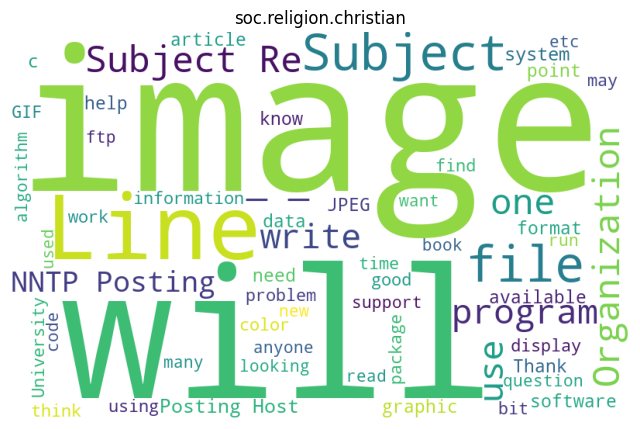

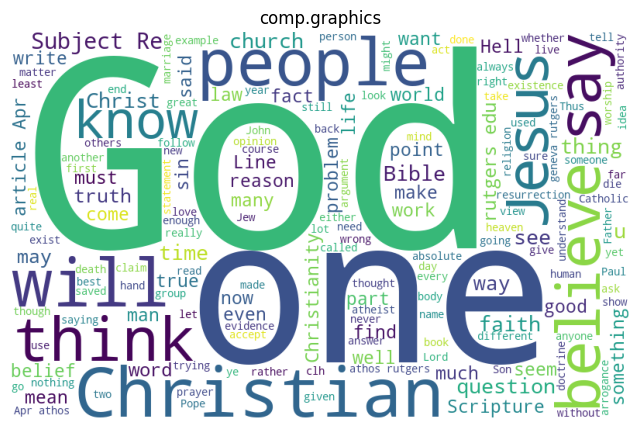

In [27]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')